In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1. Visualizint the tope 15 products (by name ) traded from Australia to Middle East based on 2023 trade value

In [3]:
# Loading the master dataset.
df = pd.read_csv("cleaned_trade_master.csv")

In [4]:
# Convert numeric columns 
df["Value_2023"] = pd.to_numeric(df["Value_2023"], errors = "coerce")

In [5]:
# Group data by product name and sum total trade values 
top_products = (
    df.groupby("Product")["Value_2023"]
    .sum()
    .sort_values(ascending=False)
    .head(15)  # Pick top 15 products
)


In [6]:
print (top_products)

Product
Natural or cultured pearls, precious or semi-precious stones, precious metals, metals clad ...           139195747.0
Electrical machinery and equipment and parts thereof; sound recorders and reproducers, television ...    121909888.0
Nuclear reactors, boilers, machinery and mechanical appliances; parts thereof                            114240524.0
Vehicles other than railway or tramway rolling stock, and parts and accessories thereof                   97682680.0
Mineral fuels, mineral oils and products of their distillation; bituminous substances; mineral ...        97498899.0
Commodities not elsewhere specified                                                                       91030918.0
Plastics and articles thereof                                                                             29555178.0
Pharmaceutical products                                                                                   29028690.0
Iron and steel                                          

/var/folders/jd/0gh7qz757lj31lk3mwm20t840000gn/T/ipykernel_10823/2364079497.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


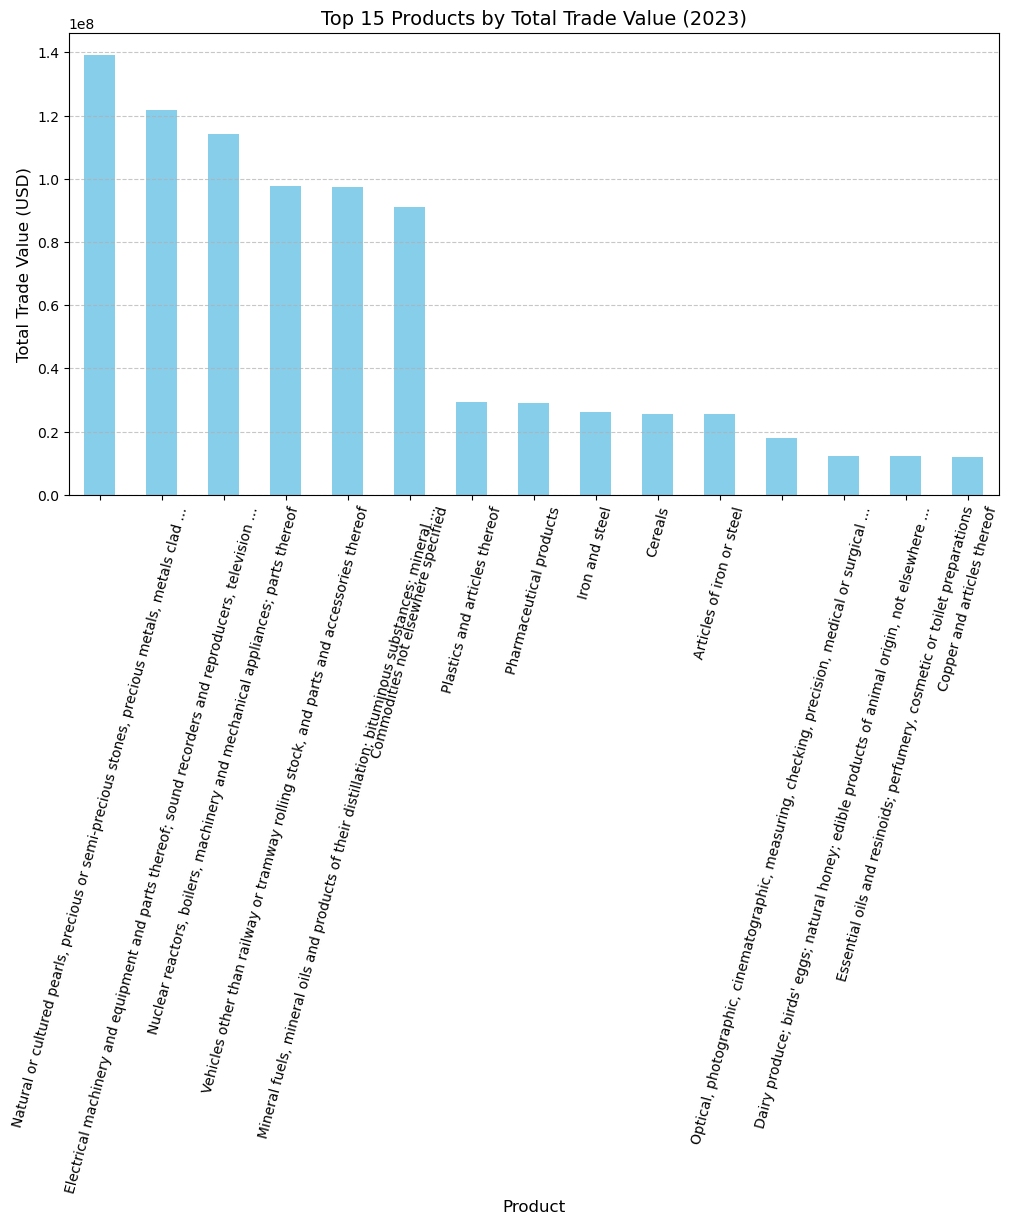

In [7]:
# Plot using matplot lib 
plt.figure(figsize=(12, 6))
top_products.plot(kind="bar", color="skyblue")

plt.title("Top 15 Products by Total Trade Value (2023)", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Trade Value (USD)", fontsize=12)
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
#2. Visualize which Middle Eastern countries import the most from Australia (based on 2023 trade value).

In [9]:
#Group by country and sum total trade value 
country_totals = (
    df.groupby("Country")["Value_2023"]
    .sum()
    .sort_values(ascending=False)
)

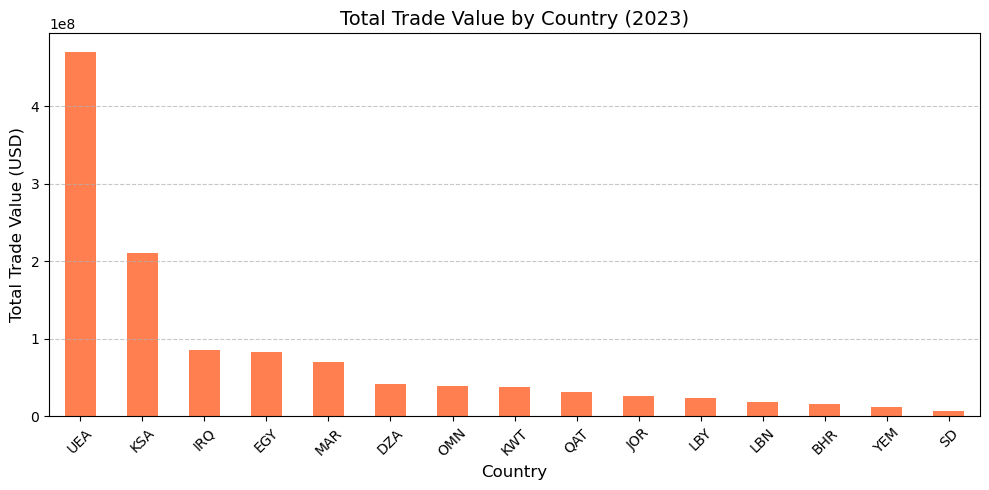

In [10]:
#Plottinng the chart
plt.figure(figsize=(10, 5))
country_totals.plot(kind="bar", color="coral")
plt.title("Total Trade Value by Country (2023)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Trade Value (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
#3. Growth Trend Analysis of 5 year as well as 1 year.

In [15]:
#Ensuring the numeric type
df["Growth_2019_2023"] = pd.to_numeric(df["Growth_2019_2023"], errors='coerce')
df["Growth_2022_2023"] = pd.to_numeric(df["Growth_2022_2023"], errors='coerce')

In [18]:
#Remove outliers using IQR filtering
#5 year growth 
q1_5y, q3_5y = df['Growth_2019_2023'].quantile([0.25, 0.75])
iqr_5y = q3_5y - q1_5y
filtered_5y = df[
    (df['Growth_2019_2023'] >= q1_5y - 1.5 * iqr_5y) &
    (df['Growth_2019_2023'] <= q3_5y + 1.5 * iqr_5y)
]

#1 year growth
q1_1y, q3_1y = df['Growth_2022_2023'].quantile([0.25, 0.75])
iqr_1y = q3_1y - q1_1y
filtered_1y = df[
    (df['Growth_2022_2023'] >= q1_1y - 1.5 * iqr_1y) &
    (df['Growth_2022_2023'] <= q3_1y + 1.5 * iqr_1y)
]

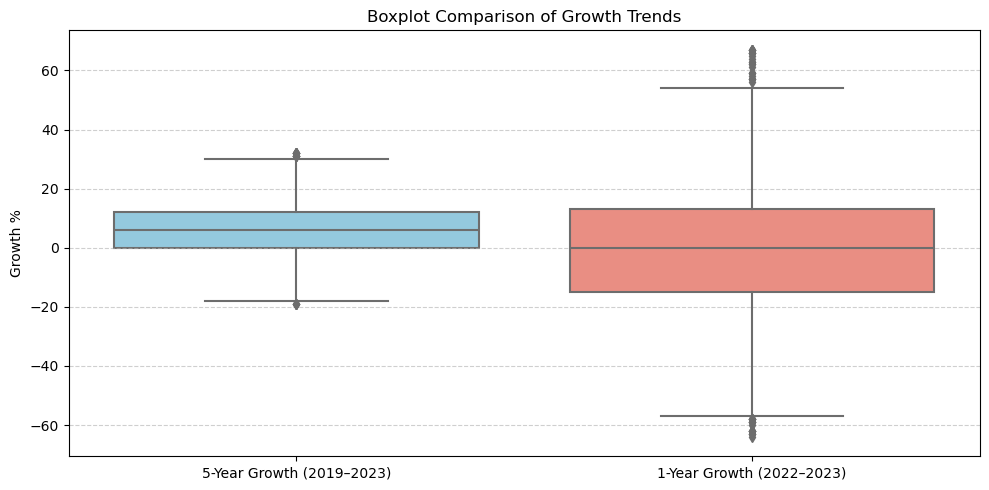

In [22]:
#Box plot comaprision
plt.figure(figsize=(10, 5))
sns.boxplot(data=[
    filtered_5y["Growth_2019_2023"],
    filtered_1y["Growth_2022_2023"]
], palette=["skyblue", "salmon"])

plt.xticks([0, 1], ["5-Year Growth (2019–2023)", "1-Year Growth (2022–2023)"])
plt.title("Boxplot Comparison of Growth Trends")
plt.ylabel("Growth %")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [21]:
#6 Summary Statistics
summary_5y = filtered_5y['Growth_2019_2023'].describe()
summary_1y = filtered_1y['Growth_2022_2023'].describe()

print("\n 5-Year Growth Summary:")
print(summary_5y)
print("\n 1-Year Growth Summary:")
print(summary_1y)



 5-Year Growth Summary:
count    1312.000000
mean        6.226372
std         9.657908
min       -19.000000
25%         0.000000
50%         6.000000
75%        12.000000
max        32.000000
Name: Growth_2019_2023, dtype: float64

 1-Year Growth Summary:
count    1322.000000
mean       -0.463691
std        24.621199
min       -64.000000
25%       -15.000000
50%         0.000000
75%        13.000000
max        67.000000
Name: Growth_2022_2023, dtype: float64
